In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [23]:
import sys
import math
import torch
import time

import pandas as pd
import numpy as np
import torch.nn as nn

from tqdm import tqdm
from torch import optim
from pathlib import Path
from docopt import docopt

from model import SentModel
from utils import prepare_df
from language_structure import load_model, Lang

base = Path('../aclImdb')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Data
df = pd.read_csv('train.csv')
lang = load_model()

# Model
hidden_size = 20
embed_size = 300
model = SentModel(embed_size, hidden_size, lang, device)
model = model.to(device)

lr = 1e-3
clip_grad = 5.
optimizer = torch.optim.Adam(model.parameters())
loss_fcn = nn.BCELoss()

# Structure Test Data 

In [6]:
from init import extract_helper

In [7]:
neg_exs, neg_labels, neg_ratings = extract_helper('test/neg/', 0)
pos_exs, pos_labels, pos_ratings = extract_helper('test/pos/', 1)

In [54]:
test_df = pd.DataFrame(data={'path': neg_exs + pos_exs,
                        'target': neg_labels + pos_labels,
                        'review_rating': neg_ratings + pos_ratings})
test_df = test_df.sample(frac=1.)
test_df.to_csv('test.csv', index=False)

# Predictions + Accuracy 

In [1]:
from train import batch_iter

In [2]:
test_df = pd.read_csv('test.csv')

NameError: name 'pd' is not defined

In [56]:
threshold = torch.tensor([0.5])
n_examples = 0
n_correct = 0
for sents, targets in batch_iter(lang, test_df[:2000], 10, shuffle=True):
    preds = model(sents)
    preds = (preds >= threshold).float()
    n_correct += torch.eq(preds, targets).sum().float()
    n_examples += len(targets)

(tensor(8.),
 10,
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]))

In [5]:
model(ex)

NameError: name 'ex' is not defined

In [6]:
test = torch.tensor([0.5, 0.2, 0.2])
test

tensor([0.5000, 0.2000, 0.2000])

In [7]:
t = torch.tensor([0.5])
t

tensor([0.5000])

In [8]:
preds_rounded = (test >= t).float()
preds_rounded

tensor([1., 0., 0.])

In [9]:
true = torch.tensor([1, 0, 1]).float()
true

tensor([1., 0., 1.])

In [14]:
(1 - torch.abs(preds_rounded - true)).sum() / len(true)

tensor(0.6667)

In [16]:
torch.eq(preds_rounded, true).sum().float() / len(true) 

tensor(0.6667)

In [40]:
len(true)

3

In [ ]:
def validate():
    threshold = torch.tensor([0.5])
    n_examples = 0
    n_correct = 0
    for sents, targets in batch_iter(lang, test_df[:2000], 10, shuffle=True):
        preds = model(sents)
        preds = (preds >= threshold).float()
        n_correct += (1 - torch.abs(preds - targets)).sum()
        n_examples += len(targets)
    
    return n_correct / n_examples

In [17]:
loss = accuracy = val_loss = val_accuracy = []

In [18]:
loss.append(1)

In [19]:
loss, accuracy, val_loss, val_accuracy 

([1], [1], [1], [1])

In [20]:
loss = accuracy = val_loss = val_accuracy = 0

In [21]:
loss += 1

In [22]:
loss, accuracy, val_loss, val_accuracy 

(1, 0, 0, 0)

# Metrics

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
model_save_path = 'model.bin'

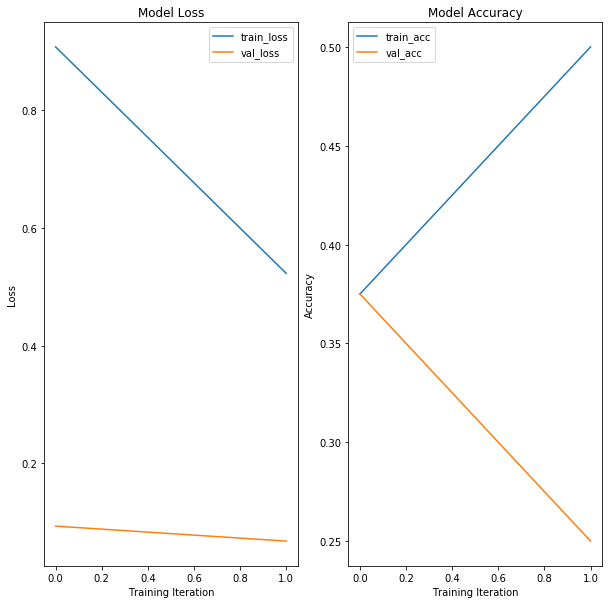

In [55]:
metrics = torch.load(model_save_path + '.metrics')

def plot_metrics(metrics):
    metrics = pd.DataFrame(metrics)
    metrics['itr'] = list(range(len(metrics['train_loss'])))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    
    # plot loss 
    ax1.plot('itr', 'train_loss', data=metrics)
    ax1.plot('itr', 'val_loss', data=metrics)
    ax1.legend()
    ax1.set_xlabel('Training Iteration')
    ax1.set_ylabel('Loss')
    ax1.set_title('Model Loss')
    
    # plot accuracy
    ax2.plot('itr', 'train_acc', data=metrics)
    ax2.plot('itr', 'val_acc', data=metrics)
    ax2.legend()
    ax2.set_xlabel('Training Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Model Accuracy')
    
    plt.plot()

plot_metrics(metrics)